# Conformity, anticonformity and polarization of opinions

## Tyll Krueger, J. Szwabiński, T. Weron

### 21.11.2016

This jupyter notebook is a suplementary material to the manuscript *Conformity, anticonformity and polarization of opinions: insights from a mathematical model of opinion dynamics*  [[1]](#ref1). 

## 1. Dynamical system

Our goal is to investigate the dynamical system given by Eq. (15) in  Ref. [[1]](#ref1), 

$$
\frac{dx}{dt} = (1-x)(\bar{p}x+p(1-y))^q - x(\bar{p}(1-x)+py)^q 
$$

$$
\frac{dy}{dt} = (1-y)(\bar{p}y+p(1-x))^q - y(\bar{p}(1-y)+px)^q
$$

where $p$ is the interaction parameter (probability of being connected to other clique), and $\bar{p}=1-p$.

## 2. Direction fields

We start our analysis by plotting the direction fields:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random as rd

In [2]:
X, Y = np.meshgrid(np.arange(0, 1.05, .05), np.arange(0, 1.05, .05))

p = 0.2
pbar = 1.0 - p
q = 3 

def f(x,y):
    return (1.0-x)*(pbar*x + p*(1.0-y))**q - x*(pbar*(1.0-x) + p*y)**q

def g(x,y):
    return (1.0-y)*(pbar*y + p*(1.0-x))**q - y*(pbar*(1.0-y) + p*x)**q

def dfield(x,y):
    u = f(x,y)
    v = g(x,y)
    return [u,v]

U, V = dfield(X,Y)
M = (np.hypot(U, V))                        # norm growth rate 
M[ M == 0] = 1.                             # avoid zero division errors 
U /= M                                      # normalize each arrows
V /= M

plt.figure()
Q = plt.quiver(X, Y, U, V, M, pivot='mid')
plt.title('p = %0.2f, q = %d' %(p,q))

## 3. Steady states

Steady states of the system may be calculated with SymPy, i.e. a Python library for symbolic mathematics (http://www.sympy.org/).

In [3]:
import sympy as sm

In [4]:
#define equations for symbolic analysis
x, y = sm.symbols('x,y', negative=False)
XX = (1.0-x)*(pbar*x + p*(1.0-y))**q - x*(pbar*(1.0-x) + p*y)**q
YY = (1.0-y)*(pbar*y + p*(1.0-x))**q - y*(pbar*(1.0-y) + p*x)**q

In [5]:
#set equations to zero
XXEqual = sm.Eq(XX,0)
YYEqual = sm.Eq(YY,0)

In [6]:
#find equilibria
equilibria = sm.solve((XXEqual,YYEqual),x,y)

In [7]:
for fp in equilibria:
    print(fp)

(0.0, 1.00000000000000)
(0.00530766741876632, 0.277473194394675)
(0.0188747756753119, 0.0188747756753119)
(0.277473194394675, 0.00530766741876632)
(0.500000000000000, 0.500000000000000)
(0.722526805605325, 0.994692332581234)
(0.981125224324688, 0.981125224324688)
(0.994692332581234, 0.722526805605325)
(1.00000000000000, 0.0)


Once we have the equilibria, we can put them on the direction field plot:

(-0.1, 1.1)

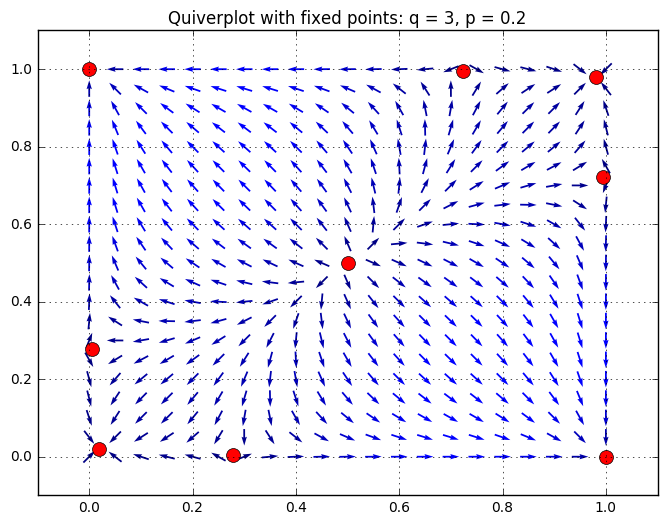

In [8]:
#plot
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)


ax4.quiver(X, Y, U, V, M, pivot='mid')
ax4.grid()

# plot fixed points
for point in equilibria:
    ax4.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
    
ax4.set_title("Quiverplot with fixed points: q = {}, p = {}".format(q,p))
ax4.set_xlim([-0.1,1.1])
ax4.set_ylim([-0.1,1.1])


## 4. Stability analysis

In [9]:
from cmath import sqrt as sq # needed to calculate (complex) squareroots of negative numbers

# put equations into matrix-form and compute Jacobian-matrix  
eqMat = sm.Matrix([ XX, YY ])
Mat = sm.Matrix([ x, y ])
jacMat = eqMat.jacobian(Mat)

# iterate through list of equilibria
for item in equilibria:
    eqmat = jacMat.subs([ (x, item[0]), (y, item[1]) ])
    det = eqmat.det()
    tr = eqmat[0,0] + eqmat[1,1]
    lambda1 = complex((tr - sq(tr**2 - 4*det))/2) 
    lambda2 = complex((tr + sq(tr**2 - 4*det))/2)
    print('Check the fixed point  (%s, %s)' % (item[0],item[1])) 
    print('    lambda1 = %s, lambda2 = %s'%(lambda1,lambda2))
    print('    The real part of the first eigenvalue is %s' %lambda1.real)
    print('    The real part of the second eigenvalue is %s' % lambda2.real)    
    
    if (lambda1.real < 0 and lambda2.real < 0):
        print('    The fixed point in %s, %s is a sink. It is stable' % (item[0],item[1]))
    if (lambda1.real > 0 and lambda2.real > 0):
        print('    The fixed point in %s, %s is a source. It is unstable' % (item[0],item[1]))
    if (lambda1.real > 0 and lambda2.real < 0):
        print('    The fixed point in %s, %s is a saddle. It is unstable' % (item[0],item[1]))
    if (lambda1.real < 0 and lambda2.real > 0):
        print('    The fixed point in %s, %s is a saddle. It is unstable' % (item[0],item[1]))
    print('----------------------------')

Check the fixed point  (0.0, 1.00000000000000)
    lambda1 = (-1+0j), lambda2 = (-1+0j)
    The real part of the first eigenvalue is -1.0
    The real part of the second eigenvalue is -1.0
    The fixed point in 0.0, 1.00000000000000 is a sink. It is stable
----------------------------
Check the fixed point  (0.00530766741876632, 0.277473194394675)
    lambda1 = (-0.5605751379874091+0j), lambda2 = (0.2642788416911129+0j)
    The real part of the first eigenvalue is -0.5605751379874091
    The real part of the second eigenvalue is 0.2642788416911129
    The fixed point in 0.00530766741876632, 0.277473194394675 is a saddle. It is unstable
----------------------------
Check the fixed point  (0.0188747756753119, 0.0188747756753119)
    lambda1 = (-0.4+0j), lambda2 = (-0.33333333333333315+0j)
    The real part of the first eigenvalue is -0.4
    The real part of the second eigenvalue is -0.33333333333333315
    The fixed point in 0.0188747756753119, 0.0188747756753119 is a sink. It is stabl

## 5. Bifurcation diagram in $p$

In [10]:
q = 3
fpx = []
fpy = []
for p in np.arange(0.1,1.0,0.01):
    pbar = 1 - p
    x, y = sm.symbols('x,y', negative=False)
    XX = (1.0-x)*(pbar*x + p*(1.0-y))**q - x*(pbar*(1.0-x) + p*y)**q #rhs of the dynamical system
    YY = (1.0-y)*(pbar*y + p*(1.0-x))**q - y*(pbar*(1.0-y) + p*x)**q   
    
    eqMat = sm.Matrix([ XX, YY ])  # rhs in matrix form
    Mat = sm.Matrix([ x, y ])
    jacMat = eqMat.jacobian(Mat)  #jacobi matrix of the system

    XXEqual = sm.Eq(XX,0)  #nullclines equations
    YYEqual = sm.Eq(YY,0)
    equilibria = sm.solve((XXEqual,YYEqual),x,y)
    
    for pt in equilibria:
        #check if real        
        if isinstance(pt[0],sm.Float) and isinstance(pt[1],sm.Float):
            fpx.append((p,pt[0]))
            fpy.append((p,pt[1]))

In [11]:
# check some of the results
for t in range(4):
    print('p : {}, x: {}'.format(fpx[t][0],fpx[t][1]))

p : 0.1, x: 0.0
p : 0.1, x: 0.000247643068273609
p : 0.1, x: 0.00142247798908397
p : 0.1, x: 0.411313415484413


In [12]:
# extract points from fpx and fpy - at the moment manually, any ideas how to do that automatically?
p = np.arange(0.1,1.0,0.01)
p1 = np.zeros(len(p))
p2 = np.ones(len(p))
u3 = np.ones(len(p))*0.5

In [13]:
# consensus points - extracted manually (any ideas how to automate this?)
k1 = [0.001422,0.001975,0.002678,0.003563,0.004665,0.006026,0.007696,0.009735,0.012216,0.015226,0.018875,0.023294,0.028652,0.035159,0.043086,0.052786,0.064734]
k2 = [0.998578,0.998025,0.997322,0.996437,0.995335,0.993974,0.992304,0.990265,0.987784,0.984774,0.981125,0.976706,0.971348,0.964841,0.956914,0.947214,0.935266]

In [14]:
# remaining unstable points - extracted manually (any ideas how to automate this?)
u1 = [0.000248,0.000357,0.000504,0.000698,0.000954,0.001290,0.001727,0.002297,0.003042,0.004018,0.005308,0.007028,0.009362,0.012604,0.017284,0.024510,0.037498,0.079576,0.098235,0.122082,0.153312,0.195842,0.258225,0.372484]
u2 = [0.411313,0.400554,0.389348,0.377656,0.365437,0.352641,0.339209,0.325072,0.310145,0.294323,0.277473,0.259416,0.239904,0.218567,0.194790,0.167368,0.132976]
u4 = [1.0-i for i in u1]
u5 = [1.0-i for i in u2]

In [15]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.plot(p,p1,'r-',linewidth=2,label="$P_1$")
ax.plot(p,p2,'r-',linewidth=2,label="$P_2$")
ax.plot(p,u3,'b-.',linewidth=2,label="$R_1$")
ax.plot(p[:len(k1)],k1,"g-",linewidth=2,label="$C_1$")
ax.plot(p[:len(k2)],k2,"g-",linewidth=2,label="$C_2$")
ax.scatter(p[:len(u1)],u1,marker=".",color="m",label="$U_1$")
ax.scatter(p[:len(u2)],u2,marker=".",color="k",label="$U_2$")
ax.scatter(p[:len(u4)],u4,marker=".",color="m",label="$U_3$")
ax.scatter(p[:len(u5)],u5,marker=".",color="k",label="$U_4$")
ax.set_xlabel("$p$",fontsize=18)
ax.set_ylabel("$x$",fontsize=18)
ax.set_xlim([0.1,0.5])
ax.set_ylim([-0.05,1.05])
ax.set_title("$q=3$",fontsize=20)
plt.legend(fontsize=18)

See Ref. [[1]](#ref1) for more explanations.

## 6. The system in time and in phase plane

In [20]:
#define rhs of the dynamical system for numerical solutions
def rhs(u,t):
    x = u[0]
    y = u[1]  
    return np.array([f(x,y),g(x,y)]) 

In [23]:
#solve numerically 
from scipy.integrate import odeint
init= [0.1,0.6]
t = np.linspace(0,100,1000)

p = 0.2
pbar = 1.0 - p
q = 3 

fig, axes = plt.subplots(1, 2,figsize=(15,3))
u = odeint(rhs,init,t)
axes[0].plot(t,u[:,0],label="$x$")   
axes[0].plot(t,u[:,1],label="$y$")   
axes[0].set_title(r"Dynamics in time",fontsize=16)
axes[0].set_xlabel(r"$time$",fontsize=16)
axes[0].set_ylabel(r"$x/y$",fontsize=16)
axes[0].legend(loc=5,fontsize=12)
axes[1].set_title(r"Phase space portrait",fontsize=16)
axes[1].set_xlim([0,1])
axes[1].set_ylim([0,1])
axes[1].set_xlabel(r"$x$",fontsize=16)
axes[1].set_ylabel(r"$y$",fontsize=16)
axes[1].plot(u[:,0],u[:,1])   
plt.show()

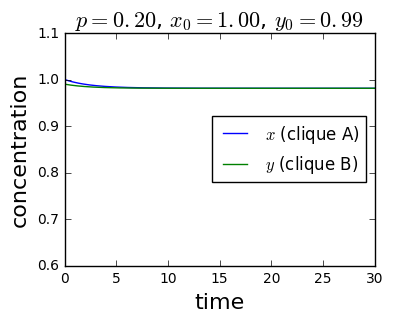

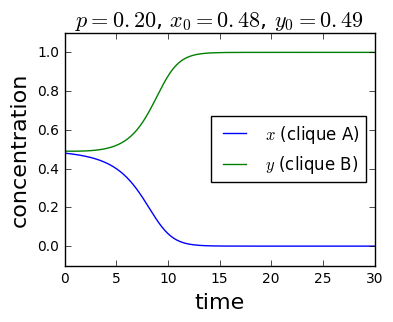

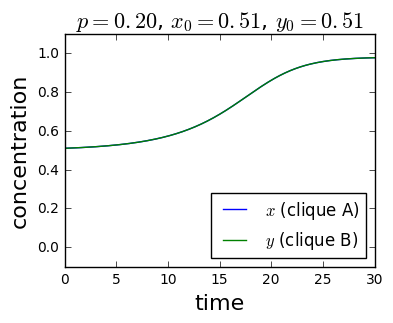

In [24]:
init= [(1.00,0.99),(0.48,0.49),(0.51,0.51)]
t = np.linspace(0,100,1000)

for ind,ic in enumerate(init):
    fig = plt.figure(figsize=(4, 3))
    ax = plt.subplot(111)
    u = odeint(rhs,ic,t)
    ax.plot(t,u[:,0],label="$x$ (clique A)")   
    ax.plot(t,u[:,1],label="$y$ (clique B)")   
    ax.set_title(r"$p = %.2f$, $x_0 = %.2f$, $y_0 = %.2f$"%(p,ic[0],ic[1]),fontsize=16)
    ax.set_xlabel(r"time",fontsize=16)
    ax.set_ylabel(r"concentration",fontsize=16)
    ax.set_xlim(0,30)
    if ind == 0:
        ax.set_ylim(0.6,1.1)
    else:    
        ax.set_ylim(-0.1,1.1)
    if ind == 2:
        ax.legend(loc=4,fontsize=12)        
    else:    
        ax.legend(loc=5,fontsize=12)
    plt.show()

In [25]:
p = 0.4
pbar = 1.0 - p
q = 3 

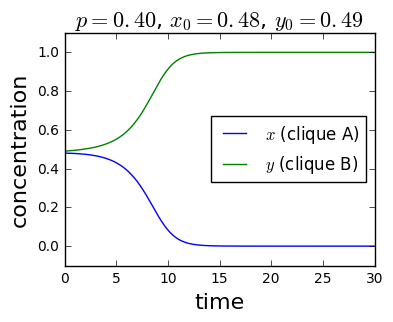

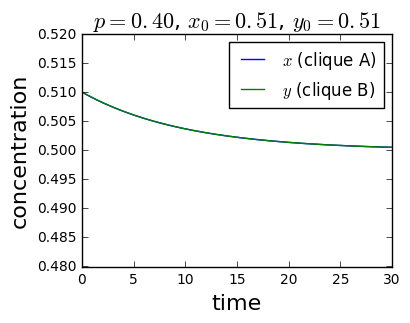

In [26]:
init= [(1.00,0.99),(0.48,0.49),(0.51,0.51)]
t = np.linspace(0,100,1000)

for ind,ic in enumerate(init):
    fig = plt.figure(figsize=(4, 3))
    ax = plt.subplot(111)
    u = odeint(rhs,ic,t)
    ax.plot(t,u[:,0],label="$x$ (clique A)")   
    ax.plot(t,u[:,1],label="$y$ (clique B)")   
    ax.set_title(r"$p = %.2f$, $x_0 = %.2f$, $y_0 = %.2f$"%(p,ic[0],ic[1]),fontsize=16)
    ax.set_xlabel(r"time",fontsize=16)
    ax.set_ylabel(r"concentration",fontsize=16)
    ax.set_xlim(0,30)
    if ind == 2:
        ax.set_ylim(0.48,0.52)
    else:    
        ax.set_ylim(-0.1,1.1)
    if ind == 2:
        ax.legend(loc=1,fontsize=12)        
    else:    
        ax.legend(loc=5,fontsize=12)
    plt.show()

## 7. Basins of attraction

In [27]:
p = 0.2
pbar = 1.0 - p
q = 3 

In [28]:
t = np.linspace(0,100,1000)

p1x = [] # for fixed point (1.0,0.0) 
p1y = []

p2x = [] # for fixed point (0.0,1.0)
p2y = []

k1x = [] # for fixed point (0.98,0.98)
k1y = []

k2x = [] # for fixed point (0.0189,0.0189)
k2y = []

for x in np.arange(0, 1.05, .01):
    for y in np.arange(0, 1.05, .01):
        
        init= [x,y]
        u = odeint(rhs,init,t)
        xend = u[-1,0]
        yend = u[-1,1]
        if abs(xend-yend)<10e-4: #due to floating point errors
            if xend > 0.5:
                k1x.append(x)
                k1y.append(y)
            else: 
                k2x.append(x)
                k2y.append(y)
        else:
            if xend>yend:
                p1x.append(x)
                p1y.append(y)
            else:    
                p2x.append(x)
                p2y.append(y)

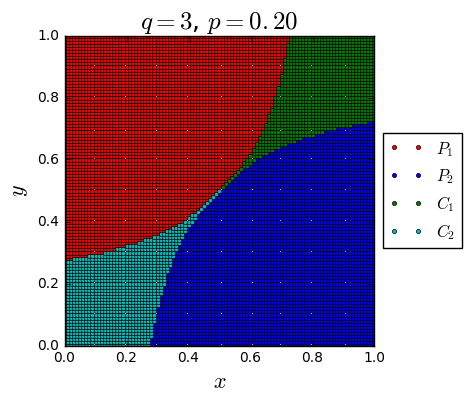

In [29]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(p2x,p2y,'ro',markersize=3,label="$P_1$")
ax.plot(p1x,p1y,'bo',markersize=3,label="$P_2$")
ax.plot(k1x,k1y,'go',markersize=3,label="$C_1$")
ax.plot(k2x,k2y,'co',markersize=3,label="$C_2$")
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel("$x$",fontsize=16)
ax.set_ylabel("$y$",fontsize=16)
ax.set_title("$q=%d$, $p=%.2f$"%(q,p),fontsize=18)
plt.axes().set_aspect('equal')
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [30]:
p = 0.4
pbar = 1.0 - p
q = 3 

In [31]:
t = np.linspace(0,100,1000)

p1x = [] # for fixed point (1.0,0.0) 
p1y = []

p2x = [] # for fixed point (0.0,1.0)
p2y = []


rx = [] # for hyperbolic point (0.5,0.5)
ry = []

for x in np.arange(0, 1.05, .01):
    for y in np.arange(0, 1.05, .01):
        
        init= [x,y]
        u = odeint(rhs,init,t)
        xend = u[-1,0]
        yend = u[-1,1]
        if abs(xend-yend)<10e-4: #due to floating point errors
            rx.append(x)
            ry.append(y)
        else:
            if xend>yend:
                p1x.append(x)
                p1y.append(y)
            else:    
                p2x.append(x)
                p2y.append(y)

In [32]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(p2x,p2y,'ro',markersize=3,label="$P_1$")
ax.plot(p1x,p1y,'bo',markersize=3,label="$P_2$")
#ax.plot(rx,ry,'go',markersize=3,label="$R_1$")
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel("$x$",fontsize=16)
ax.set_ylabel("$y$",fontsize=16)
ax.set_title("$q=%d$, $p=%.2f$"%(q,p),fontsize=18)
plt.axes().set_aspect('equal')
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## References

[1] <a id="ref1"></a> T. Krueger, J. Szwabiński, T. Weron, *Conformity, anticonformity and polarization of opinions: insights from a mathematical model of opinion dynamics*, working paper (2016), Arxiv: https://arxiv.org/abs/1608.08810
